# Data Exploration : Yelp Dataset 

A public dataset made available by the resurants review site; Yelp. All personally identifiable information has been removed.

### Read the data

In [2]:
import pandas as pd
yelp_raw_data = pd.read_csv("yelp_review.csv")
yelp_raw_data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


## Is the data organized or not?

Because we have a nice row/column structure, we can conclude that this
data seems pretty organized.

## What does each row represent?

It seems pretty obvious that each row represents a user giving a review of a
business. The next thing we should do is to examine each row and label it by
the type of data it contains. At this point, we can also use python to figure
out just how big our dataset is. We can use the shape quality of a Dataframe
to find this out, as shown:

In [3]:
yelp_raw_data.shape

(5261668, 9)

It tells us that this dataset has 5261668 rows and 9 columns. Another way to
say this is that this dataset has 5261668 observations and 9 characteristics.

## What does each column represent?

• review_id: This is likely a unique identifier for the review that each post
represents. This would be at the nominal level because, again, there is no
natural order to this identifier.


• user_id: This is likely a unique identifier for the user who is writing the
review. Just like the other unique IDs, we place this data at the nominal
level.


• business_id: This is likely a unique identifier for the business the review is
for. This would be at the nominal level because there is no natural order to
this identifier.


• stars: From a quick look (don't worry; we will perform some further
analysis soon), we can see that this is an ordered column that represents
what the reviewer gave the restaurant as a final score. This is ordered and
qualitative; so, this is at the ordinal level.


• date: This is probably the date at which the review was posted. Note that
it seems to be only specific to the day, month, and year. Even though time
is usually considered continuous, this column would likely be considered
discrete and at the ordinal level because of the natural order that dates have.



• text: This is likely the raw text that each reviewer wrote. As with most text,
we place this at the nominal level.


• useful, funny cool: Boolean features. We
place this at the nominal level.




## Are there any missing data points?

Perform an isnull operation to show the number of missing values in each
column.

In [4]:
yelp_raw_data.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [5]:
yelp_raw_data.isnull()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5261663,False,False,False,False,False,False,False,False,False
5261664,False,False,False,False,False,False,False,False,False
5261665,False,False,False,False,False,False,False,False,False
5261666,False,False,False,False,False,False,False,False,False


## Do we need to perform any transformations on the columns?

At this point, we are looking for a few things. For example, will we need to
change the scale of some of the quantitative data, or do we need to create
dummy variables for the qualitative variables? As this dataset has only
qualitative columns, we can only focus on transformations at the ordinal and
nominal scale.

<hr>

## Dataframes

When we read in a dataset, Pandas creates a custom object called Dataframe. Think
of this as the python version of a spreadsheet (but way better). In this case, the
variable, yelp_raw_data, is a Dataframe.

In [6]:
type(yelp_raw_data)

pandas.core.frame.DataFrame

## Series

The Series object is simply a Dataframe, but only with one dimension. Essentially,
it is a list of data points. Each column of a Dataframe is considered to be a Series
object. Let's check this. The first thing we need to do is grab a single column from our
Dataframe; we generally use what is known as bracket notation.

In [12]:
yelp_raw_data['business_id']

0          AEx2SYEUJmTxVVB18LlCwA
1          VR6GpWIda3SfvPC-lg9H3w
2          CKC0-MOWMqoeWf6s-szl8g
3          ACFtxLv8pGrrxMm6EgjreA
4          s2I_Ni76bjJNK9yG60iD-Q
                    ...          
5261663    Ngk84Ax1tXgpoJFEGxot3w
5261664    pOEL97ld-FJMKO8Ki8JmYg
5261665    5ubokMNw8qfbX2WtxgJG1Q
5261666    EO3i5kTUG7_S2OIQ23sdSA
5261667    HloEEXm_QzEpycuwA_RtQA
Name: business_id, Length: 5261668, dtype: object

In [13]:
type(yelp_raw_data['business_id'])

pandas.core.series.Series

## Exploration tips for qualitative data

Using these two Pandas objects, let's start performing some preliminary data
exploration. For qualitative data, we will specifically look at the nominal and
ordinal levels.

### Nominal level columns

As we are at the nominal level, let's recall that at this level, data is qualitative and is
described purely by name. In this dataset, this refers to the business_id, review_
id, text, type, and user_id. Let's use Pandas in order to dive a bit deeper, as shown
here:

In [14]:
yelp_raw_data['business_id'].describe()

count                    5261668
unique                    174567
top       4JNXUYY8wbaaDmk3BPzlWw
freq                        7362
Name: business_id, dtype: object

The describe function will give us some quick stats about the column whose name
we enter into the quotation marks. Note how Pandas automatically recognized that
business_id was a qualitative column and gave us stats that make sense. When
describe is called on a qualitative column, we will always get the following four
items:
##### • count: How many values are filled in
##### • unique: How many unique values are filled in
##### • top: The name of the most common item in the dataset
##### • freq: How often the most common item appears in the dataset

At the nominal level, we are usually looking for a few things, that would signal a
transformation:

• Do we have a reasonable number (usually under 20) of unique items?

• Is this column free text?

• Is this column completely unique across all rows?

In [15]:
yelp_raw_data['review_id'].describe()

count                    5261668
unique                   5261668
top       gqiuYtmJN9RzRbg-ZOKgUg
freq                           1
Name: review_id, dtype: object

In [16]:
yelp_raw_data['text'].describe()

count                                               5261668
unique                                              5258354
top       BE WARNED about the NEW REWARD PROGRAM being p...
freq                                                     17
Name: text, dtype: object

### Filtering in Pandas

In [17]:
duplicate_text = yelp_raw_data['text'].describe()['top']

In [18]:
print(duplicate_text)

BE WARNED about the NEW REWARD PROGRAM being promoted to unsuspecting customers!! This is all about SELLING YOUR INFORMATION!! READ the TERMS and CONDITIONS!! You're being WARNED about this REWARD PROGRAM that you MUST SIGN UP for if you want to earn any points for movies or $30 Popcorn Perks. You MUST give your Physical Address, Full Name, and Birthdate! This information WILL BE VERIFIED with a Financial App, similar to an eVerify!! I tried signing up with a disposable phone and a PO Box and it would not let me proceed and gave me an "error message" stating that my identity could not be VERIFIED!! Also, be sure to READ the TERMS & CONDITIONS where you'll find deep into the 5th page that by agreeing (you must agree or you will not be able to sign up) you've essentially signed your rights away and agree to hold Harkins harmless to any illegal acts made against you, slip and fall, forced and mandatory arbitration, AND HARKINS Will SELL your Personal Iinformation!!!!! AND as if this isn't

In [20]:
text_is_the_duplicate = yelp_raw_data['text'] == duplicate_text
type(text_is_the_duplicate) # it is a Series of Trues and Falses
text_is_the_duplicate.head() # shows a few Falses out of the Series

0    False
1    False
2    False
3    False
4    False
Name: text, dtype: bool

In [21]:
sum(text_is_the_duplicate)

17

In [23]:
filtered_dataframe = yelp_raw_data[text_is_the_duplicate]
# the filtered Dataframe
filtered_dataframe.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
666297,dSoJwsRuh8fWEYqHxMGwEg,JjQbdQ7Y91qsssm0vbVyVg,VfX7rhtX03yNg56ISz8gVQ,1,2017-11-26,BE WARNED about the NEW REWARD PROGRAM being p...,0,0,0
666298,ujQhfbcKLTxKf7hF4DhU2w,JjQbdQ7Y91qsssm0vbVyVg,sNBaDJM4Khm1BbrBRyrMVQ,1,2017-11-26,BE WARNED about the NEW REWARD PROGRAM being p...,0,0,0
666300,U4JyIKq6XE5Inf2euHGLMA,JjQbdQ7Y91qsssm0vbVyVg,Q3G58vv1ClvH4re9QBsVgQ,1,2017-11-26,BE WARNED about the NEW REWARD PROGRAM being p...,0,0,0
666301,i37-FpzoYyt117Xi7QZutA,JjQbdQ7Y91qsssm0vbVyVg,9pg2QPvwLomBLo9R-J2_Yw,1,2017-11-26,BE WARNED about the NEW REWARD PROGRAM being p...,0,0,0
666303,mHEK6Bfud-hbPirGeFftaw,JjQbdQ7Y91qsssm0vbVyVg,_98ytLdlPEDp0FTuO31R7Q,1,2017-11-26,BE WARNED about the NEW REWARD PROGRAM being p...,0,0,0


### Ordinal level columns

As far as ordinal columns go, we are looking at date and stars. For each of these
columns, let's look at what the describe method brings back:

In [24]:
yelp_raw_data['stars'].describe()

count    5.261668e+06
mean     3.727739e+00
std      1.433593e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

Woah! Even though this column is ordinal, the describe method returned stats that
we might expect for a quantitative column. This is because the software saw a bunch
of numbers and just assumed that we wanted stats like the mean or the min and
max. This is no problem. Let's use a method called value_counts to see the count
distribution, as shown here:

In [25]:
yelp_raw_data['stars'].value_counts()

5    2253347
4    1223316
1     731363
3     615481
2     438161
Name: stars, dtype: int64

The value_counts method will return the distribution of values for any column.
In this case, we see that the star rating 4 is the most common, with 3526 values,
followed closely by the rating 5. We can also plot this data to get a nice visual. First,
let's sort by star rating, and then use the prebuilt plot method to make a bar chart.

<AxesSubplot:>

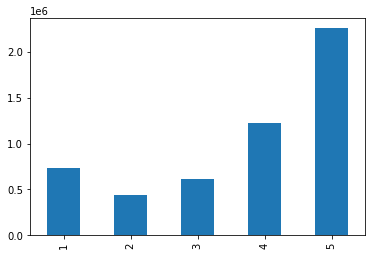

In [29]:
dates = yelp_raw_data['stars'].value_counts()
dates = dates.sort_index()
dates.plot(kind='bar')